
# Unidad Práctica 1: Introducción al curso de visualización con Python

Por **Eduardo Graells-Garrido**. <egraells@udd.cl>. 

Actualizado: **3 de Marzo de 2022**.

El objetivo de esta práctica es **mostrar el potencial de visualizar datos con estas herramientas** y **entregar una base para comenzar a experimentar a partir de la biblioteca `aves`**. Los detalles (los _por qué_ y los _cómo se hace_) los veremos en siguientes prácticas.

## Google Colab

Google Colab es una plataforma que te permite ejecutar este notebook en la nube de Google: http://colab.google.com

La siguiente ccelda de código instala `conda` en tu entorno de Colab a través de la biblioteca `condacolab`. `conda` es un programa que administra las bibliotecas y módulos instaladas en un sistema, y se encarga de configurar un entorno de trabajo para el curso a través de la biblioteca `aves` (lo veremos más adelante en este mismo notebook).

Al ejecutar esta celda se reiniciará tu entorno de Colab y aparecerá un error. **Es normal, no te preocupes**. Luego puedes seguir ejecutando las siguientes celdas.

In [ ]:
try:
    import google.colab
    !pip uninstall matplotlib -y
    !pip install -q condacolab
    
    import condacolab
    condacolab.install_mambaforge()
except ModuleNotFoundError:
    pass

La siguiente celda descarga el repositorio de `aves` a tu entorno. Lo necesitaremos porque allí están los datos y el archivo de configuración de dependencias:

Este comando instala lo necesario. Se toma su tiempo pues debe descargar muchos módulos de Python:

In [ ]:
try:
    import google.colab
    !git clone https://github.com/zorzalerrante/aves.git aves_git
    !mamba env update --name base --file aves_git/environment-colab-light.yml
except ModuleNotFoundError:
    pass

Ahora ya tienes un entorno con `aves` en tu Colab. ¡Felicitaciones!

## Preámbulo: matplotlib en Python

Como base de trabajo en el curso utilizaremos la biblioteca [`matplotlib`](https://matplotlib.org/). Lo primero que hacemos es importar en nuestro notebook las bibliotecas necesarias (en esta ocasión iremos importando bibliotecas a medida que las necesitemos, más adelante usualmente importaremos todo en un comienzo del notebook).

In [1]:
# matplotlib tiene muchas componentes. la principal es pyplot. la usaremos como plt
import matplotlib as mpl
import matplotlib.pyplot as plt

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96
# esto depende de las fuentes que tengas instaladas en el sistema.
#mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

# numpy es una biblioteca de bajo nivel, sobre la que construye pandas.
# la utilizaremos en esta sección para generar datos de prueba.
import numpy as np

En esta sección explicaremos la base de esta biblioteca: una **figura** (fig) y sus **ejes** (_axes_).

La figura es el equivalente a todo el lienzo sobre el que se trabaja la imagen.

Los ejes son las visualizaciones individuales que están presentes en la figura.

El siguiente código crea una figura (`fig`) y un eje asociado a ella (`ax`). Vemos que `ax` posee funciones que nos permiten configurar su apariencia:

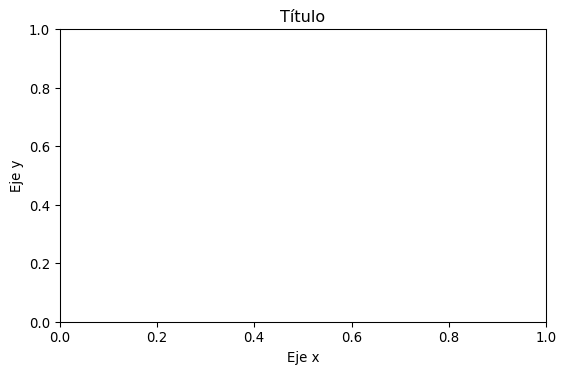

In [10]:
fig, ax = plt.subplots()

ax.set_title("Título")
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")

# ajusta el espacio utilizado por todos los elementos en la pantalla
fig.tight_layout()


Como no hacemos nada más, el eje está vacío. Con numpy podemos crear unos datos de prueba para incorporar en el gráfico.

In [11]:
test_x = np.linspace(-5, 5, num=50)
test_y = np.cos(test_x)


Usaremos el método `plot` de `ax` para graficar esos datos:

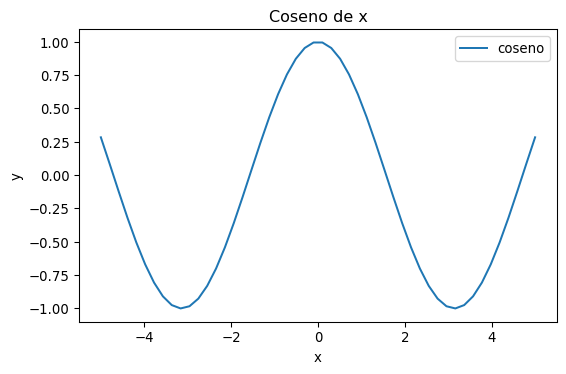

In [12]:
fig, ax = plt.subplots()

ax.plot(test_x, test_y, "-", label="coseno")

ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()


Podemos crear datos auxiliares extra y usar más veces el método `plot`, con distintos parámetros:

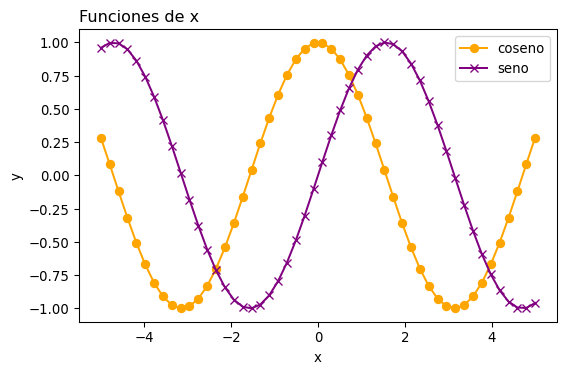

In [13]:
test_z = np.sin(test_x)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(test_x, test_y, "-o", color="orange", label="coseno")
ax.plot(test_x, test_z, "-x", color="purple", label="seno")

ax.set_title("Funciones de x", loc="left")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()

fig.tight_layout()


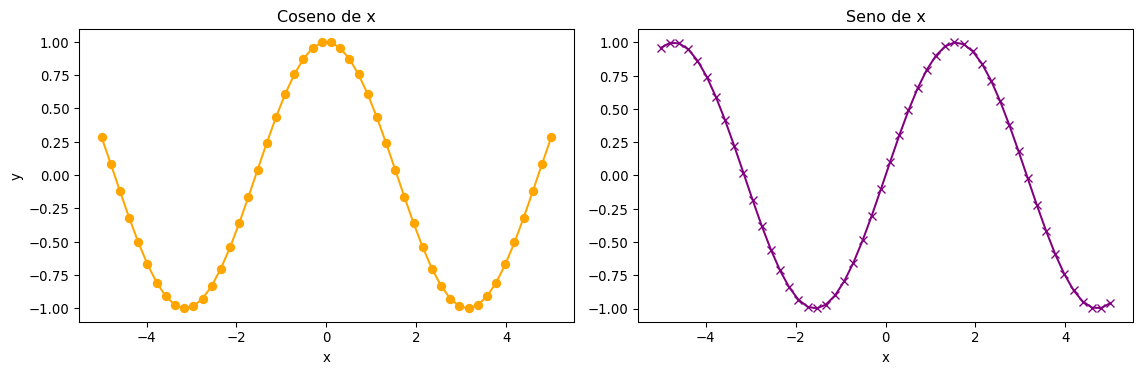

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(test_x, test_y, "-o", color="orange", label="coseno")
axes[0].set_title("Coseno de x")

axes[1].plot(test_x, test_z, "-x", color="purple", label="seno")
axes[1].set_title("Seno de x")

axes[0].set_xlabel("x")
axes[1].set_xlabel("x")
axes[0].set_ylabel("y")

fig.tight_layout()


Para aprender más sobre las componentes de una visualización en `matplotlib` podemos leer la siguiente nota: [Anatomía de una figura](https://matplotlib.org/stable/gallery/showcase/anatomy.html).

## Usando Datos con `pandas`: La Encuesta Origen Destino de Santiago

`pandas` es la biblioteca de Python que se utiliza para trabajar con datos tabulares. La utilizaremos constantemente durante el curso. 

El _dataset_ que más analizaremos es la Encuesta Origen-Destino 2012 de Santiago. Le llamaremos EOD. La EOD es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Se recolectó por última vez el año 2012. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta: 

> ¿Cuáles viajes hiciste ayer?

Las personas encuestadas llenaron un _diario de viaje_, que incluyó todos los datos pertinentes de la rutina del día anterior: a qué hora iniciaron cada viaje, a qué hora terminaron, los lugares de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También se incluye información socio-demográfica de cada persona y de sus hogares. Suena bien, ¿no? Es un dataset que contiene datos de todo tipo: cualitativos, cuantitativos y geográficos. Se pueden responder muchas preguntas relevantes para la sociedad. 

Ahora bien, antes de seguir con el código en este notebook, tengan en cuenta las siguientes consideraciones:

1. **Hay que diferenciar análisis de personas encuestadas de análisis de población**. La encuesta asigna un _factor_ o _peso_ a cada persona, a cada hogar, y a cada viaje. Estos pesos indican la representatividad de cada una de estas unidades de análisis. Por ejemplo, un viaje que es común (ir a trabajar desde A hasta B en metro) tendrá mayor peso que un viaje poco frecuente (hacer un trabajo para la universidad).
2. **La encuesta es representativa a nivel comunal**. La cantidad de hogares encuestados y el peso de cada observación permite hacer un análisis fidedigno para cada comuna, o bien para la ciudad completa Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones reales puesto que la cantidad de encuestas en ese barrio no es suficiente.
  
Por tanto, **los análisis presentados en este curso son explorativos e ilustrativos, pero no son representativos**. En algunos casos sí consideraremos los factores de expansión de las muestras, pero aún así hay que tener cuidado a la hora de interpretar los resultados.

La encuesta está disponible en el [Portal de Datos del Gobierno](http://datos.gob.cl/dataset/31682). Este dataset ya viene incluido en el módulo [`aves`](http://github.com/zorzalerrante/aves). `aves` tiene tres métodos que se encargan de cargar los datos: `read_people` (tabla de personas), `read_homes` (tabla de hogares)  y `read_trips` (tabla de viajes).

Lo primero que haremos es indicar la ruta a los datos, que variará dependiendo de como instalaste `aves`. En este caso, asumo que estás en la carpeta del repositorio si trabajas en local, o, si usas Colab, que aves está en la carpeta `aves_git`:

In [15]:
import sys
from pathlib import Path

AVES_ROOT = Path("..") if not "google.colab" in sys.modules else Path("aves_git")
EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH


PosixPath('../data/external/EOD_STGO')

Ahora procedemos a cargar los datos desde aves:

In [16]:
from aves.data import eod

In [17]:
personas = eod.read_people(EOD_PATH)
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60054 entries, 0 to 60053
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hogar                      60054 non-null  int64  
 1   Persona                    60054 non-null  int64  
 2   AnoNac                     60054 non-null  int64  
 3   Sexo                       60054 non-null  object 
 4   Relacion                   60054 non-null  object 
 5   Viajes                     60054 non-null  int64  
 6   LicenciaConducir           60054 non-null  object 
 7   PaseEscolar                60054 non-null  int64  
 8   AdultoMayor                60054 non-null  int64  
 9   Estudios                   59932 non-null  float64
 10  Curso                      59932 non-null  float64
 11  Actividad                  57969 non-null  object 
 12  Ocupacion                  25586 non-null  object 
 13  ActividadEmpresa           25586 non-null  flo

In [18]:
hogares = eod.read_homes(EOD_PATH)
hogares.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hogar         18264 non-null  int64  
 1   Sector        18264 non-null  object 
 2   Zona          18264 non-null  int64  
 3   Comuna        18264 non-null  object 
 4   DirCoordX     18264 non-null  float64
 5   DirCoordY     18264 non-null  float64
 6   Fecha         18264 non-null  object 
 7   DiaAsig       18264 non-null  object 
 8   TipoDia       18264 non-null  int64  
 9   Temporada     18264 non-null  int64  
 10  NumPer        18264 non-null  int64  
 11  NumVeh        18264 non-null  int64  
 12  NumBicAdulto  18264 non-null  int64  
 13  NumBicNino    18264 non-null  int64  
 14  Propiedad     18264 non-null  int64  
 15  MontoDiv      2081 non-null   float64
 16  ImputadoDiv   18264 non-null  int64  
 17  MontoArr      18264 non-null  int64  
 18  ImputadoArr   18264 non-nu

Algunas variables cualitativas están codificadas como números. Más adelante en el curso hablaremos de las diferencias entre atributos cuantitativos (`int64`, `float64`) y los cualitativos (`int64`). 

Ahora carguemos los viajes:

In [19]:
viajes = eod.read_trips(EOD_PATH)
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100334 entries, 0 to 113590
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Hogar                     100334 non-null  int64          
 1   Persona                   100334 non-null  int64          
 2   Viaje                     100334 non-null  int64          
 3   Etapas                    100334 non-null  int64          
 4   ComunaOrigen              98146 non-null   object         
 5   ComunaDestino             98021 non-null   object         
 6   SectorOrigen              98364 non-null   object         
 7   SectorDestino             98281 non-null   object         
 8   ZonaOrigen                100334 non-null  int64          
 9   ZonaDestino               100334 non-null  int64          
 10  OrigenCoordX              93715 non-null   float64        
 11  OrigenCoordY              93715 non-null   float64  

En algunos análisis querremos mezclar estas tablas. `pandas` nos facilita la vida gracias al método `merge`:

In [20]:
personas_hogar = personas.merge(hogares)
personas_hogar.shape


(60054, 59)

In [21]:
viajes_persona_hogar = viajes.merge(personas).merge(hogares)
viajes_persona_hogar.shape


(100334, 96)

In [22]:
viajes.head()

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada
0,173431,17343102,1734310202,1,Maipú,Maipú,Poniente,Poniente,400,407,...,1.000000,NaN,NaN,NaN,NaN,0.0,Bip!,5387,7608,0
1,173441,17344101,1734410101,2,Maipú,Las Condes,Poniente,Oriente,407,307,...,1.127220,NaN,NaN,NaN,NaN,0.0,Bip!,18841,26100,0
2,173441,17344101,1734410102,2,Las Condes,Maipú,Oriente,Poniente,307,407,...,1.127220,NaN,NaN,NaN,NaN,0.0,Bip!,18841,26100,0
3,173441,17344103,1734410301,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,...,1.127220,NaN,NaN,NaN,NaN,0.0,Bip!,13392,17589,0
4,173441,17344103,1734410302,2,Ñuñoa,Maipú,Oriente,Poniente,437,407,...,1.052764,NaN,NaN,NaN,NaN,0.0,Bip!,13392,17589,0


Los siguientes pasos serán responder preguntas con estos datos.

## ¿Dónde están los hogares entrevistados?

La primera pregunta que podemos hacer busca entender quiénes han sido entrevistados. Observamos que cada hogar tiene coordenadas x e y, entonces, podemos utilizar una visualización básica para mostrar directamente x e y de cada hogar.

Hacemos el cálculo con una operación `groupby`:

In [23]:
hogares_x_comuna = hogares.groupby("Comuna").size().sort_values()
hogares_x_comuna


Comuna
CALERA DE TANGO         152
PADRE HURTADO           157
TALAGANTE               157
ISLA DE MAIPO           166
EL MONTE                175
PIRQUE                  176
BUIN                    176
LAMPA                   184
LO ESPEJO               196
CERRILLOS               200
SAN RAMON               217
PEÑAFLOR                225
INDEPENDENCIA           225
LO PRADO                228
LA CISTERNA             229
LO BARNECHEA            234
HUECHURABA              235
MELIPILLA               236
SAN JOAQUIN             244
VITACURA                254
COLINA                  259
SAN MIGUEL              265
LA REINA                272
QUINTA NORMAL           278
MACUL                   279
PEDRO AGUIRRE CERDA     296
LA GRANJA               304
CERRO NAVIA             306
CONCHALI                310
ESTACION CENTRAL        331
RENCA                   344
RECOLETA                385
EL BOSQUE               415
PEÑALOLEN               489
PROVIDENCIA             502
LA PINTANA   

¿Cómo haríamos el mismo cálculo considerando los factores de expansión? En vez de contar la cantidad de filas por cada comuna, tenemos que sumar el factor de expansión de cada hogar:

In [27]:
hogares_x_comuna = hogares.groupby("Comuna")["FactorHogar"].sum().sort_values()
hogares_x_comuna


Comuna
PIRQUE                   6393.000204
CALERA DE TANGO          6477.000217
ISLA DE MAIPO            7335.000203
EL MONTE                 8405.999901
PADRE HURTADO           13943.000924
TALAGANTE               15280.999954
BUIN                    20928.000414
LAMPA                   22053.999653
MELIPILLA               23299.001092
PEÑAFLOR                23655.000068
CERRILLOS               23735.001069
INDEPENDENCIA           24535.999824
HUECHURABA              24960.000212
LO BARNECHEA            25554.000269
SAN RAMON               27026.000375
LA CISTERNA             27269.000017
SAN JOAQUIN             28169.999989
VITACURA                28731.999785
LA REINA                28956.999659
LO ESPEJO               28989.999366
COLINA                  29381.001113
LO PRADO                30302.000940
SAN MIGUEL              30651.999192
PEDRO AGUIRRE CERDA     31835.999442
QUINTA NORMAL           34468.000265
MACUL                   37326.999615
CONCHALI                37328.9

Las `Series` y `DataFrames` de `pandas` tienen un método `plot` que nos permite graficar el resultado directamente, sin necesidad de crear la figura y los ejes:

<AxesSubplot:ylabel='Comuna'>

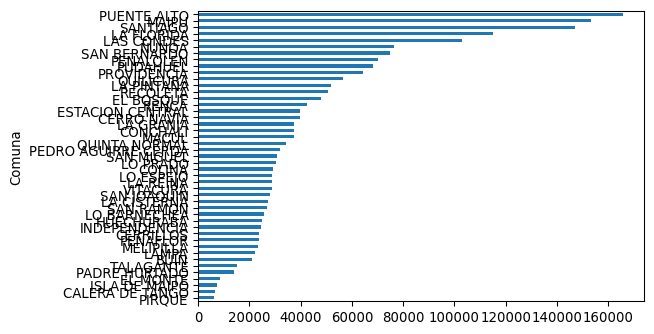

In [28]:
hogares_x_comuna.plot(kind="barh")


Aunque claramente necesitamos trabajar en la apariencia del gráfico. Como usa matplotlib, y sabiendo que el método `plot` entrega el eje donde se grafica, podemos entregarle parámetros que conocimos y configurar el eje a nuestra pinta: 

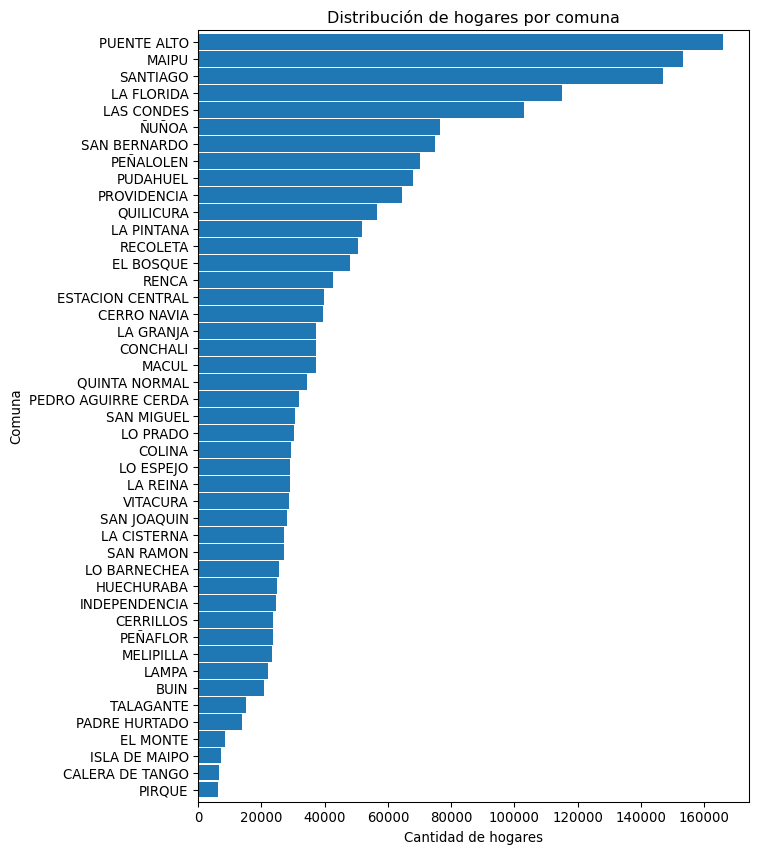

In [30]:
fig, ax = plt.subplots(figsize=(8,9))
ax = hogares_x_comuna.plot(kind="barh", width=0.9, ax=ax)
ax.set_xlabel("Cantidad de hogares")
ax.set_title("Distribución de hogares por comuna")
fig.tight_layout()


El gráfico responde nuestra pregunta. Sin embargo, quizás la interpretación de "dónde" es geográfica. En tal caso podemos utilizar los atributos `DirCoordX` y `DirCoordY` que vienen en la tabla, y usar un gráfico de dispersión (`scatterplot`):

<AxesSubplot:xlabel='DirCoordX', ylabel='DirCoordY'>

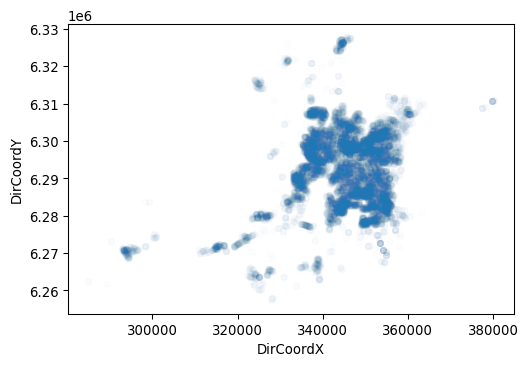

In [31]:
hogares.plot(x="DirCoordX", y="DirCoordY", kind="scatter", alpha=0.01)


Reconocemos la forma de los puntos, sabemos que es Santiago. Ahora bien, quizás quisiéramos darles un color para representar otra variable, por ejemplo, el sector de la ciudad donde se ubican. Para ello el método `plot` de pandas por sí solo ya es limitado.

Aquí es donde podemos usar la biblioteca `seaborn`, que se construye sobre `pandas` y `matplotlib`. También incluye un `scatterplot`. 

In [32]:
import seaborn as sns

El uso del método es similar al de `pandas`: debemos decirle cuál columna del `DataFrame` corresponde a cada eje del gráfico, `x` e `y`. Debemos entregarle también un parámetro `data`, y tenemos un parámetro adicional `hue` que recibe el nombre de la variable que se usará para pintar cada punto:

<AxesSubplot:xlabel='DirCoordX', ylabel='DirCoordY'>

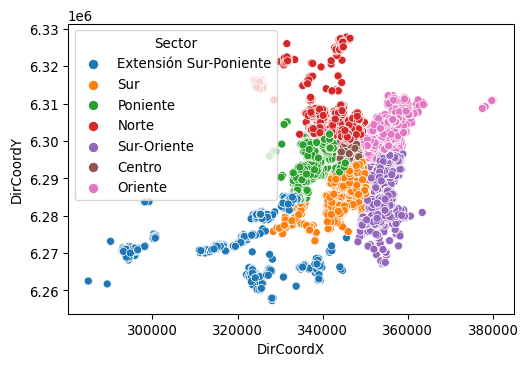

In [33]:
sns.scatterplot(x="DirCoordX", y="DirCoordY", data=hogares, hue="Sector")

Otra manera de interactuar con seaborn (y también con pandas) es a través de la creación manual de la figura. Luego le podemos decir al método `scatterplot` que utilice un `ax` específico para el gráfico:

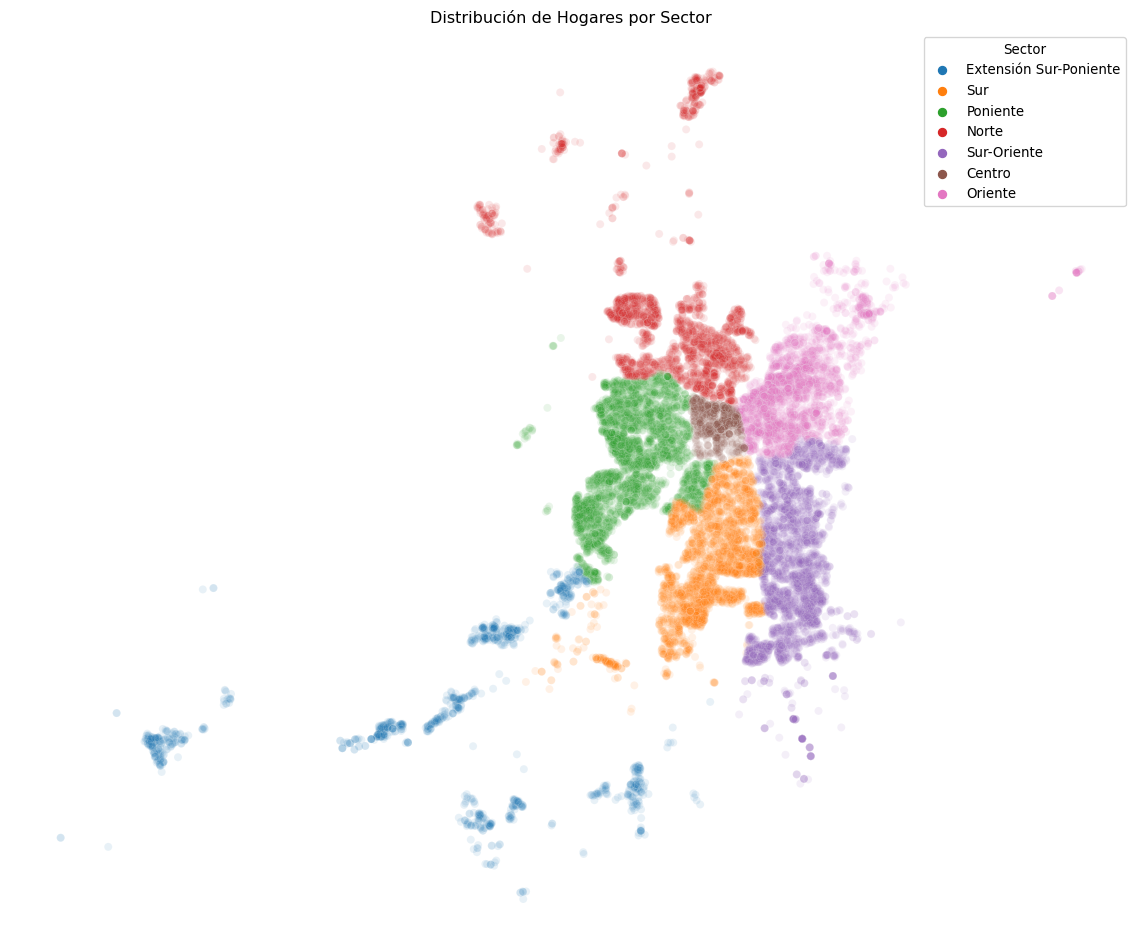

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.scatterplot(
    x="DirCoordX", y="DirCoordY", data=hogares, hue="Sector", alpha=0.1, ax=ax
)

ax.set_title("Distribución de Hogares por Sector")
ax.set_axis_off()

fig.tight_layout()


Veremos más sobre visualización de datos geográficos en la clase de mapas. 

## ¿Cuál es la distribución de edad de las personas encuestadas? 

Sin visualización podemos utilizar el método `describe` que calcula estadística descriptiva simple para tener una primera aproximación de la respuesta:

In [35]:
personas["AnoNac"].describe()


count    60054.000000
mean      1975.421920
std         22.189995
min       1904.000000
25%       1959.000000
50%       1977.000000
75%       1994.000000
max       2013.000000
Name: AnoNac, dtype: float64

Sin embargo, uno podría tener más preguntas implícitas. ¿Cuándo nació más gente? ¿Cuál es la forma de la distribución?¿Tiene forma de campana?¿Es bimodal?

Podemos utilizar el método `histplot` (_histogram plot_) que se encarga de mostrarnos la distribución:

<AxesSubplot:xlabel='AnoNac', ylabel='Count'>

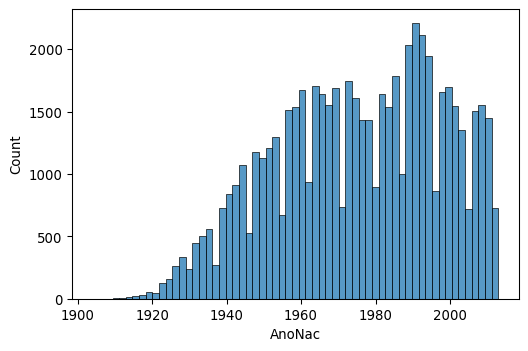

In [36]:
sns.histplot(data=personas, x='AnoNac')

Como observamos, el método se encarga de todo lo necesario para hacer el gráfico, incluso de determinar los rangos de las barras del histograma. Al igual que el gráfico anterior, podemos configurar todo a través de matplotlib:

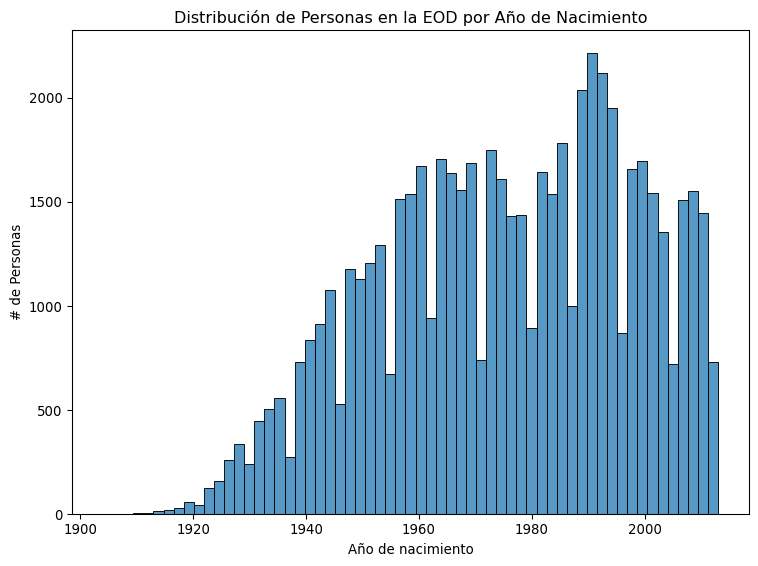

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=personas, x="AnoNac", ax=ax)

ax.set_xlabel("Año de nacimiento")
ax.set_ylabel("# de Personas")
ax.set_title("Distribución de Personas en la EOD por Año de Nacimiento")

fig.tight_layout()


Este gráfico responde la pregunta. Podríamos utilizar algunas opciones de `histplot` si queremos indagar más, pero lo dejaremos paralas siguientes clases.

## ¿Cuáles son los tipos de viaje y cuánto duran?

En este caso, lo que buscamos es saber para cada propósito de viaje el promedio de duración de éstos. Sin embargo, todes sabemos que existe variabilidad en los tiempos de viaje, ya que dependen de los modos de transporte utilizados y de la posición de los lugares de origen y destino. Entonces, necesitamos una manera de poder graficar esa variabilidad.

Una manera directa de hacerlo es utilizar un gráfico de barras para mostrar el promedio, junto con barras de error que codifican el intervalo de confianza del 95%. Esto lo permite el método `barplot` de seaborn:

<AxesSubplot:xlabel='TiempoViaje', ylabel='Proposito'>

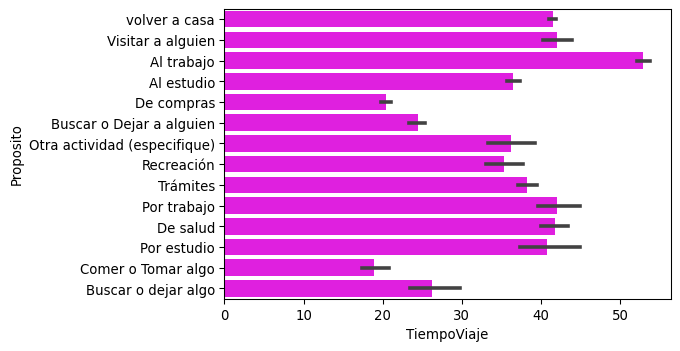

In [38]:
sns.barplot(
    y="Proposito", x="TiempoViaje", ci=99, data=viajes_persona_hogar, color="magenta"
)


Ahora bien, existe también variabilidad en tanto los orígenes y destinos de los viajes tienen influecia en el tiempo de viaje, así como también lo tiene el modo de transporte. La misma función nos permite considerar estos factores:

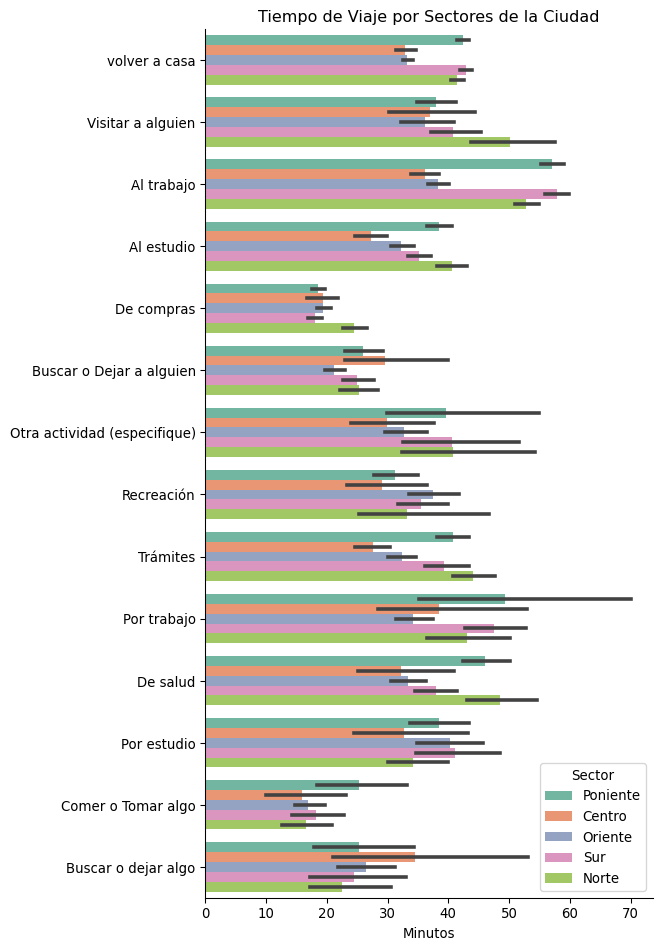

In [40]:
fig, ax = plt.subplots(figsize=(7, 10))

sns.barplot(
    y="Proposito",
    x="TiempoViaje",
    hue="Sector",
    hue_order=["Poniente", "Centro", "Oriente", "Sur", "Norte"],
    ci=99,
    data=viajes_persona_hogar,
    palette="Set2",
    ax=ax,
)

# esto quita algunos bordes del gráfico
sns.despine(ax=ax)

ax.set_title("Tiempo de Viaje por Sectores de la Ciudad")
ax.set_xlabel("Minutos")
ax.set_ylabel("")

fig.tight_layout()


El viaje al trabajo es el que toma más tiempo -- algo esperable. Al trabajo tenemos que ir esté donde esté. Pero hay diferencias notables de acuerdo al sector en el que viven las personas. 

## ¿Cuál es la distribución de uso de modo de transporte en viajes al trabajo?

Una pregunta relevante siempre. En tiempos de COVID-19 está en debate si el uso de transporte público es un foco de contagio. Entender la distribución de usos de transporte por comuna es importante para la definición de estrategias de desconfinamiento.

Primero, debemos calcular la distribución de uso de modos de transporte por comuna. 

In [41]:
modo_comuna = (
    viajes_persona_hogar[viajes_persona_hogar["Proposito"] == "Al trabajo"]
    .groupby(["Comuna", "ModoDifusion"])
    .apply(lambda x: (x["FactorPersona"] * x["FactorLaboralNormal"]).sum())
    .unstack(fill_value=0)
)

modo_comuna


ModoDifusion,Auto,Bicicleta,Bip!,Bip! - Otros Privado,Bip! - Otros Público,Caminata,Otros,Taxi,Taxi Colectivo
Comuna,,,,,,,,,
BUIN,2604.287917,1838.216760,0.000000,0.000000,576.978699,869.704559,3934.48018,0.000000,5681.632623
CALERA DE TANGO,1628.919020,642.495585,3.706586,16.158820,212.209146,909.887551,1087.09394,0.000000,291.329418
CERRILLOS,7278.168297,478.489772,5964.067992,87.431490,40.535112,402.210460,1863.36785,0.000000,352.205110
CERRO NAVIA,8706.967095,1034.222148,16864.492718,933.778450,404.005672,469.046166,820.43391,0.000000,242.490891
COLINA,6718.857099,370.928385,0.000000,0.000000,3220.845089,867.775136,8212.55015,502.411557,68.318662
CONCHALI,6299.645186,434.891474,17126.517983,0.000000,1604.135632,2957.574960,497.99987,49.149598,102.756385
EL BOSQUE,16445.271169,586.278278,14785.541405,715.383222,1172.337045,1907.773457,7171.06598,180.507835,1196.467388
EL MONTE,2860.131985,668.082644,55.245320,0.000000,581.060140,497.541306,1685.99493,0.000000,611.007226
ESTACION CENTRAL,13861.929832,4192.279694,11212.645868,174.581208,201.299562,2791.598117,704.01529,31.385195,369.339968


Veamos esta tabla como un gráfico que nos permita comparar la distribución por comunas.

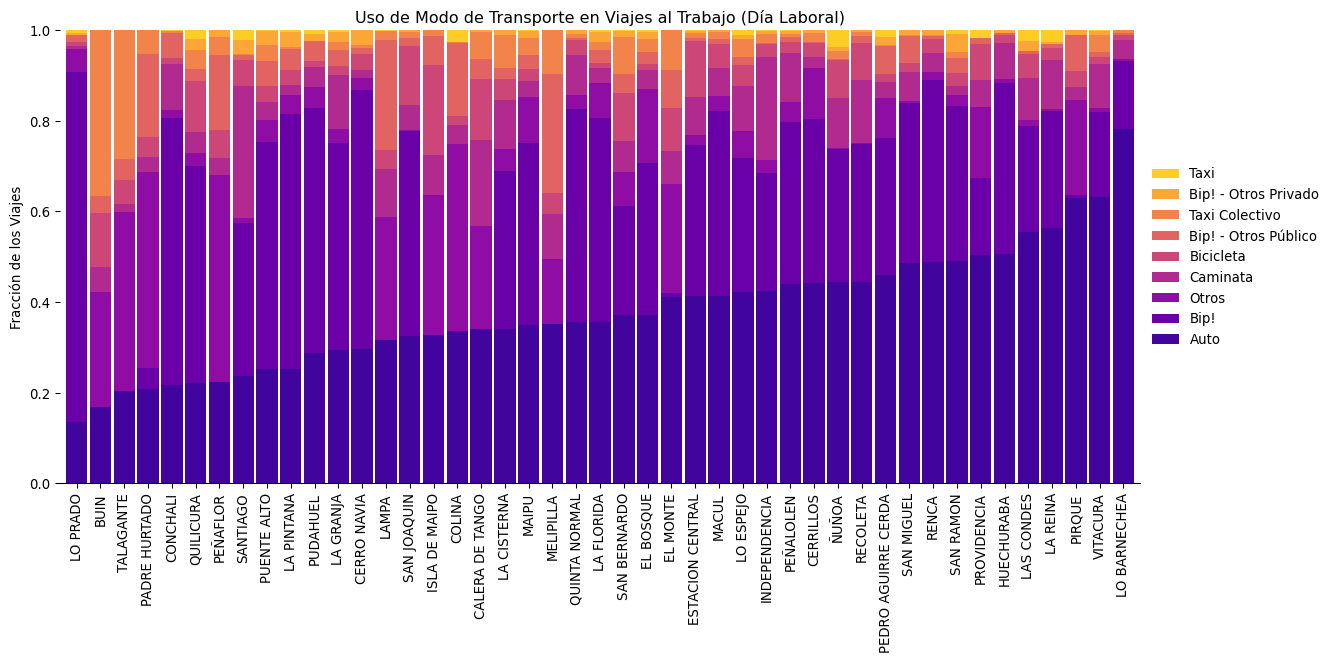

In [42]:
from aves.visualization.tables import barchart

fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax, modo_comuna, stacked=True, normalize=True, sort_categories=True, sort_items=True
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo (Día Laboral)")
ax.set_ylim([0, 1])
ax.set_xlabel("")
ax.set_ylabel("Fracción de los Viajes")

fig.tight_layout()
# fig.savefig('../reports/figures/example_barchart.png', dpi=150, bbox_inches='tight')


¡Es un gráfico interesante! Sin embargo está complejo, ya que cuesta diferenciar y comparar las distintas categorías. Creemos una categorización más sencilla que nos permita comparar mejor:

In [43]:
viajes_persona_hogar["ModoAgregado"] = viajes_persona_hogar["ModoDifusion"].map(
    {
        "Taxi": "Taxi",
        "Bip! - Otros Privado": "Público",
        "Bip!": "Público",
        "Bip! - Otros Público": "Público",
        "Taxi Colectivo": "Taxi",
        "Bicicleta": "Activo",
        "Caminata": "Activo",
        "Auto": "Auto",
        "Otros": "Otros",
    }
)

modo_comuna = (
    viajes_persona_hogar[viajes_persona_hogar["Proposito"] == "Al trabajo"]
    .groupby(["Comuna", "ModoAgregado"])
    .apply(lambda x: (x["FactorPersona"] * x["FactorLaboralNormal"]).sum())
    .unstack(fill_value=0)
)

modo_comuna


ModoAgregado,Activo,Auto,Otros,Público,Taxi
Comuna,,,,,
BUIN,2707.921319,2604.287917,3934.48018,576.978699,5681.632623
CALERA DE TANGO,1552.383136,1628.919020,1087.09394,232.074553,291.329418
CERRILLOS,880.700232,7278.168297,1863.36785,6092.034594,352.205110
CERRO NAVIA,1503.268313,8706.967095,820.43391,18202.276840,242.490891
COLINA,1238.703521,6718.857099,8212.55015,3220.845089,570.730219
CONCHALI,3392.466434,6299.645186,497.99987,18730.653615,151.905982
EL BOSQUE,2494.051735,16445.271169,7171.06598,16673.261672,1376.975223
EL MONTE,1165.623951,2860.131985,1685.99493,636.305460,611.007226
ESTACION CENTRAL,6983.877811,13861.929832,704.01529,11588.526637,400.725164


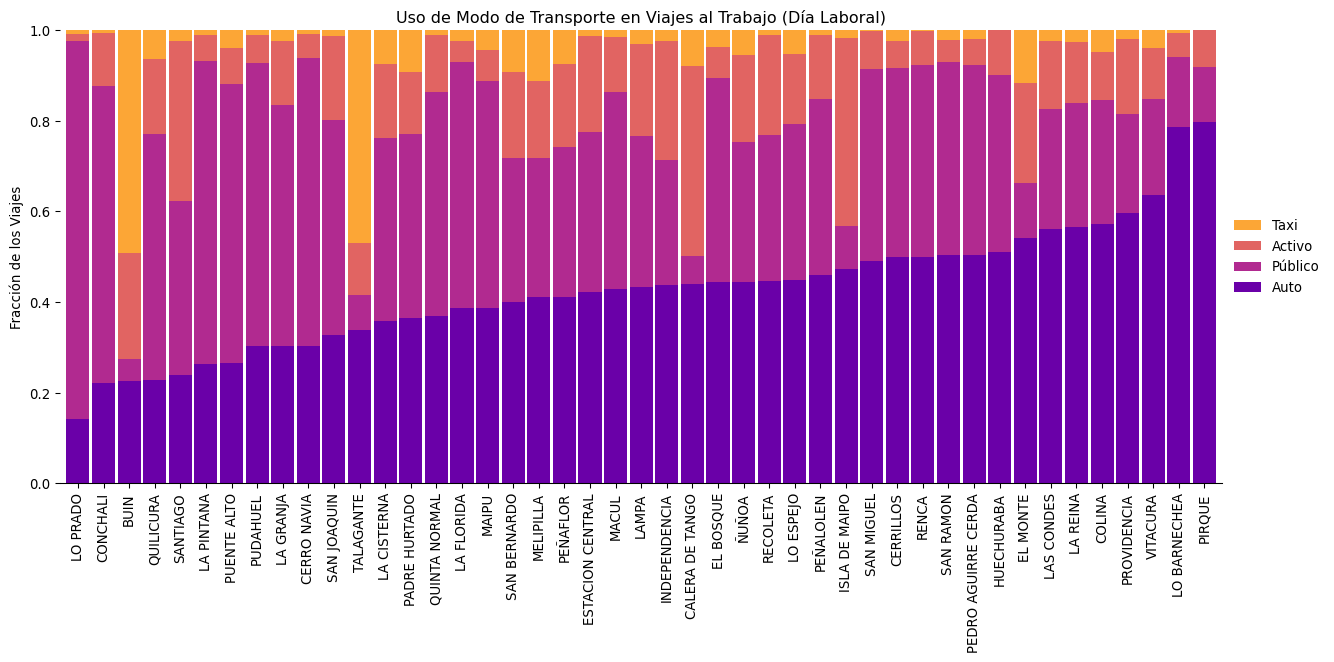

In [46]:
fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax,
    modo_comuna.drop("Otros", axis=1),
    stacked=True,
    normalize=True,
    sort_categories=True,
    sort_items=True,
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo (Día Laboral)")
ax.set_ylim([0, 1])
ax.set_xlabel("")
ax.set_ylabel("Fracción de los Viajes")

fig.tight_layout()


Verlo nos lleva a preguntarnos si existe una relación entre las propiedades de una comuna y su uso de transporte público.

Para ello calcularemos el ingreso promedio en cada comuna. Al igual que con los viajes, debemos utilizar el ingreso considerando los factores de expansión:

In [48]:
ingreso_por_comuna = (
    hogares.groupby("Comuna")
    .apply(
        lambda x: (x["FactorHogar"] * x["IngresoHogar"]).sum() / x["FactorHogar"].sum()
    )
    .rename("ingreso")
)

ingreso_por_comuna


Comuna
BUIN                   5.753514e+05
CALERA DE TANGO        5.059952e+05
CERRILLOS              5.287505e+05
CERRO NAVIA            4.213678e+05
COLINA                 6.552432e+05
CONCHALI               6.050698e+05
EL BOSQUE              5.143629e+05
EL MONTE               4.247368e+05
ESTACION CENTRAL       4.832393e+05
HUECHURABA             7.918456e+05
INDEPENDENCIA          6.057736e+05
ISLA DE MAIPO          4.074196e+05
LA CISTERNA            6.160750e+05
LA FLORIDA             7.147872e+05
LA GRANJA              5.591557e+05
LA PINTANA             4.193542e+05
LA REINA               1.521881e+06
LAMPA                  6.482933e+05
LAS CONDES             1.460452e+06
LO BARNECHEA           2.182363e+06
LO ESPEJO              4.978187e+05
LO PRADO               4.596349e+05
MACUL                  7.739653e+05
MAIPU                  5.953841e+05
MELIPILLA              4.594306e+05
PADRE HURTADO          4.827470e+05
PEDRO AGUIRRE CERDA    5.462924e+05
PEÑAFLOR             

Ahora que tenemos esta serie, podemos hacer un cruce entre las dos tablas que hemos calculado. utilizamos la función `normalize_rows` para normalizar los valores de cada comuna, y así poder compararlas:

In [49]:
from aves.features.utils import normalize_rows

modo_comuna_ingreso = modo_comuna.pipe(normalize_rows).join(ingreso_por_comuna)
modo_comuna_ingreso


,Activo,Auto,Otros,Público,Taxi,ingreso
Comuna,,,,,,
BUIN,0.174645,0.167961,0.253751,0.037212,0.366432,5.753514e+05
CALERA DE TANGO,0.323967,0.339939,0.226865,0.048432,0.060797,5.059952e+05
CERRILLOS,0.053484,0.441999,0.113161,0.369966,0.021389,5.287505e+05
CERRO NAVIA,0.051001,0.295397,0.027834,0.617541,0.008227,4.213678e+05
COLINA,0.062054,0.336588,0.411416,0.161351,0.028591,6.552432e+05
CONCHALI,0.116689,0.216686,0.017129,0.644270,0.005225,6.050698e+05
EL BOSQUE,0.056477,0.372397,0.162386,0.377559,0.031181,5.143629e+05
EL MONTE,0.167497,0.410994,0.242273,0.091436,0.087800,4.247368e+05
ESTACION CENTRAL,0.208231,0.413307,0.020991,0.345523,0.011948,4.832393e+05


Para comparar el uso de transporte público y el ingreso poddemos utilizar un `scatterplot`:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ingreso', ylabel='Público'>

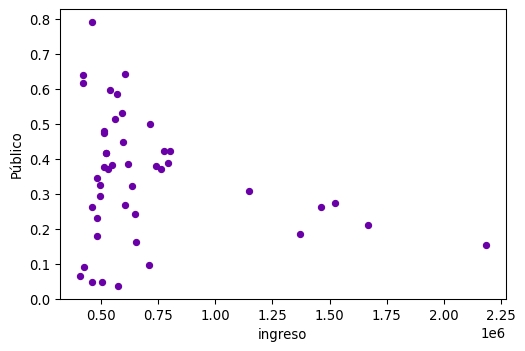

In [51]:
modo_comuna_ingreso.plot(x="ingreso", y="Público", kind="scatter")


Aunque nos gustaría saber cuál es la comuna que corresponde a cada punto, el gráfico no lo dice. Además el eje `x` utiliza una notación que nos impide apreciar los valores totales. Para ello podemos utilizar el método `scatterplot` en aves, en conjunto con configuraciones de matplotlib:

In [52]:
from aves.visualization.tables import scatterplot

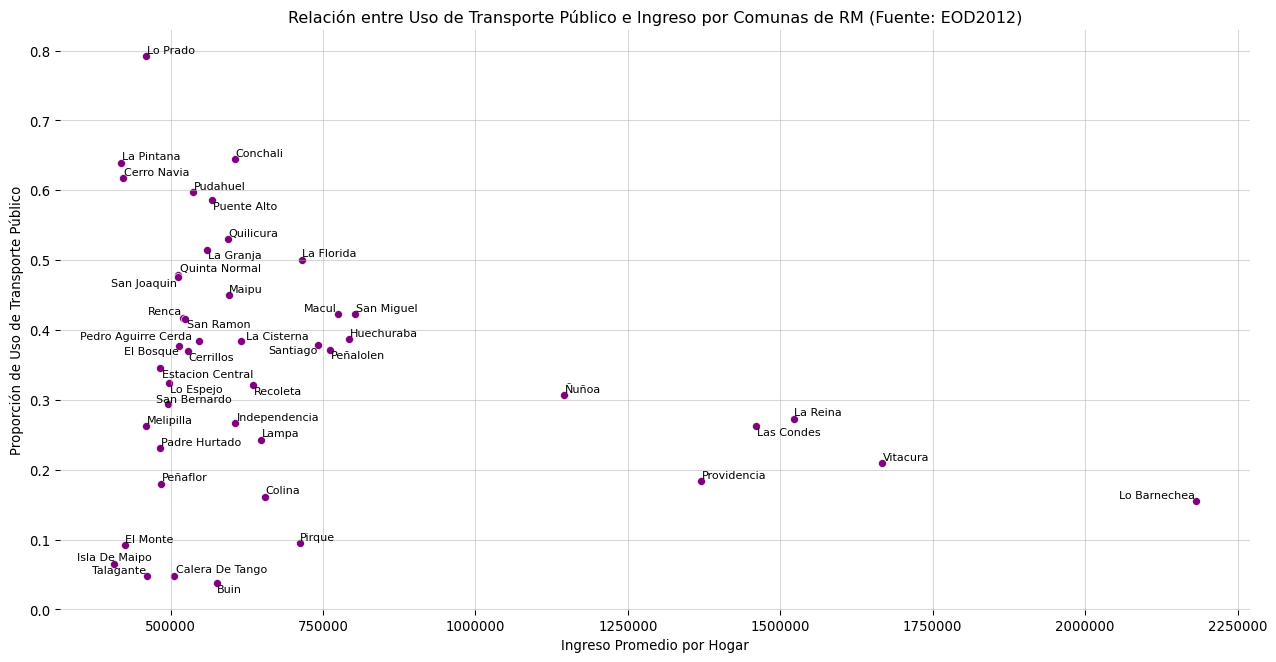

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

scatterplot(
    ax,
    modo_comuna_ingreso,
    "ingreso",
    "Público",
    annotate=True,
    avoid_collisions=True,
    text_args=dict(fontsize="small"),
    scatter_args=dict(color="purple"),
)

ax.set_xlabel("Ingreso Promedio por Hogar")
ax.set_ylabel("Proporción de Uso de Transporte Público")
ax.set_title(
    "Relación entre Uso de Transporte Público e Ingreso por Comunas de RM (Fuente: EOD2012)"
)
ax.grid(alpha=0.5)
ax.ticklabel_format(style="plain")

sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

# fig.savefig('../reports/figures/example_scatterplot.png', dpi=150, bbox_inches='tight')


Observamos que los tres grupos de uso de transporte público son: las comunas fuera del radio urbano (esquina inferior izquierda), que no son más ricas que el resto y no usan transantiago porque no llega a ellas; las comunas ricas (inferior derecha), que casi no usan transporte público a pesar de estar bien conectadas; y el resto, que presenta tasas variables de uso de transporte público.
  
## Conclusiones

Con estas herramientas podemos explorar las relaciones que hay entre las variables de nuestro dataset. Concluimos que la mayor dificultad no está en _implementar_ las visualizaciones, sino en, primero, **saber qué preguntarle a los datos**, y segundo, **elegir los métodos adecuados para responder la pregunta**. Probablemente seaborn, pandas o matplotlib tienen dicha solución implementada, o al menos a unos pasos de ser implementada. También podemos utilizar los métodos implementados en aves.

El siguiente paso es entender cómo se comportan estos métodos con otras variables del dataset. También hemos probado distintos valores para atributos de apariencia, como los tamaños de figura y las paletas de colores.

Una dificultad en el aprendizaje es que no existen estándares para nombrar a los métodos y sus parámetros. Por ejemplo, el parámetro de la paleta de colores se suele llamar `cmap` en `matplotlib` y `pandas`, pero se llama `palette` en casi todos los métodos de `seaborn` --- digo casi todos porque algunos también usan `cmap`. Esto puede ser confuso para aprender, y creo que de momento no hay una solución más que ejercitar y aprenderse los nombres de parámetros y de métodos que sean más adecuados para la tarea a resolver.
